In [1]:
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import numpy as np

/home/suyodhan/Documents/Internship/image-similarity/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-24 14:35:41.422421: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-24 14:35:41.454274: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 14:35:41.715606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, reb

In [10]:
def cosine_similarity(image1_embedding, current_embedding) -> bool:
    # Handle case where one or both embeddings are None
    if image1_embedding is None or current_embedding is None:
        return 0.0
    
    return np.dot(image1_embedding, current_embedding) / (np.linalg.norm(image1_embedding) * np.linalg.norm(current_embedding))

In [2]:
# Load the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224').to(device)



config.json: 100%|██████████| 69.7k/69.7k [00:00<00:00, 752kB/s]
model.safetensors: 100%|██████████| 346M/346M [01:05<00:00, 5.29MB/s] 


In [ ]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')


In [25]:
# Load the image and preprocess it
image1 = Image.open('/home/suyodhan/Documents/Internship/image-similarity/Images/cattle1.jpg')
inputs1 = processor(images=image1, return_tensors="pt").to(device)


image2 = Image.open('/home/suyodhan/Documents/Internship/image-similarity/Images/bike2.png')
inputs2 = processor(images=image1, return_tensors="pt").to(device)

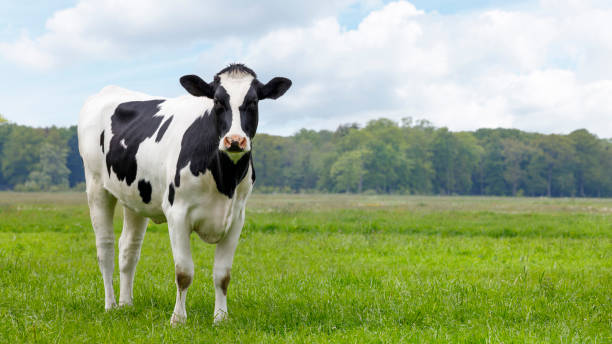

In [26]:
image1

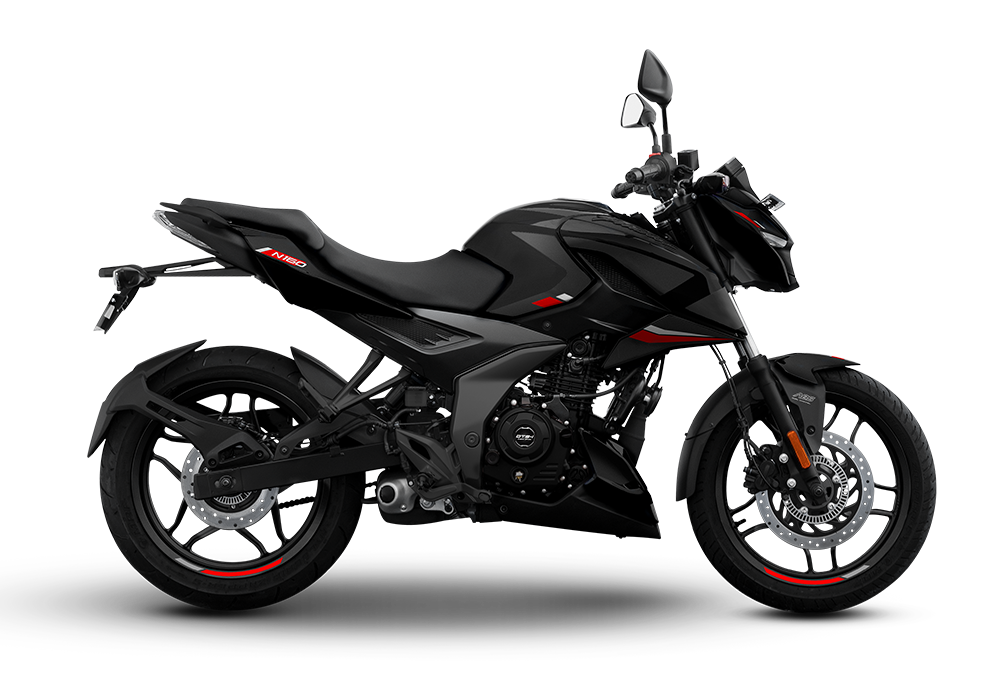

In [27]:
image2

In [31]:
# Forward pass through the model
with torch.no_grad():
    outputs1 = model(**inputs1)

with torch.no_grad():
    outputs2 = model(**inputs2)

# Obtain the embeddings
embeddings_iamge1 = outputs1.logits

embeddings_iamge2 = outputs2.logits

# Convert embeddings to numpy array if needed
embeddings_array1 = embeddings_iamge1.detach().numpy().flatten()

embeddings_array2 = embeddings_iamge2.detach().numpy().flatten()

In [34]:
embeddings_array1

array([ 7.96223283e-01, -5.53949058e-01, -2.80598909e-01, -9.51821133e-02,
       -2.38278896e-01,  3.34547639e-01,  4.27767262e-02,  4.86542344e-01,
        8.83845389e-01,  1.70232177e+00,  1.43703961e+00,  7.48671651e-01,
        6.93292618e-02, -7.43513629e-02, -4.25588578e-01,  1.24823678e+00,
        5.32334566e-01, -8.76576722e-01,  1.97472787e+00, -7.84070909e-01,
        4.16972339e-01,  2.14531302e+00,  5.97312927e-01,  5.31958640e-01,
        6.16205275e-01, -5.11672378e-01,  8.82889628e-01, -4.14717704e-01,
       -2.11358041e-01, -5.02106249e-01, -5.02008915e-01, -6.03370547e-01,
       -1.83874637e-01, -5.74295282e-01,  9.92771760e-02,  5.92779338e-01,
        6.37744486e-01, -5.80414057e-01,  8.42145503e-01, -2.23134398e-01,
       -8.34607065e-01,  5.63023269e-01, -2.05784202e-01,  1.97829485e-01,
        5.23944914e-01,  3.52492109e-02, -8.62115145e-01,  5.42226315e-01,
       -4.16487694e-01, -4.54598099e-01, -1.92123845e-01, -2.14779973e-01,
        2.62626121e-03,  

In [35]:
embeddings_array2

array([ 7.96223283e-01, -5.53949058e-01, -2.80598909e-01, -9.51821133e-02,
       -2.38278896e-01,  3.34547639e-01,  4.27767262e-02,  4.86542344e-01,
        8.83845389e-01,  1.70232177e+00,  1.43703961e+00,  7.48671651e-01,
        6.93292618e-02, -7.43513629e-02, -4.25588578e-01,  1.24823678e+00,
        5.32334566e-01, -8.76576722e-01,  1.97472787e+00, -7.84070909e-01,
        4.16972339e-01,  2.14531302e+00,  5.97312927e-01,  5.31958640e-01,
        6.16205275e-01, -5.11672378e-01,  8.82889628e-01, -4.14717704e-01,
       -2.11358041e-01, -5.02106249e-01, -5.02008915e-01, -6.03370547e-01,
       -1.83874637e-01, -5.74295282e-01,  9.92771760e-02,  5.92779338e-01,
        6.37744486e-01, -5.80414057e-01,  8.42145503e-01, -2.23134398e-01,
       -8.34607065e-01,  5.63023269e-01, -2.05784202e-01,  1.97829485e-01,
        5.23944914e-01,  3.52492109e-02, -8.62115145e-01,  5.42226315e-01,
       -4.16487694e-01, -4.54598099e-01, -1.92123845e-01, -2.14779973e-01,
        2.62626121e-03,  

In [32]:
cosine_similarity_score = cosine_similarity(embeddings_array1, embeddings_array2)

In [33]:
cosine_similarity_score

1.0